In [25]:
# Importing the important libraries to work on our Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
# reading the dataset in the notebook
df = pd.read_csv("C:/Users/tanma/Desktop/Udemy/Complete DS course/project/mlproject/notebook/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# checking the shape of the dataframe
print(f"Number of records = {df.shape[0]}")
print(f"Total number of features = {df.shape[1]}")

Number of records = 1000
Total number of features = 8


In [4]:
# checking info of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**From the above results we can observe that the data types of each of the feature are correct and we need not to change their data types.**

In [5]:
# checking the null values if any
pd.DataFrame(df.isnull().sum()/df.shape[0]*100,columns = ['Perc_null_values'])

,Perc_null_values
gender,0.0
race_ethnicity,0.0
parental_level_of_education,0.0
lunch,0.0
test_preparation_course,0.0
math_score,0.0
reading_score,0.0
writing_score,0.0


**From the above results we observed that there are no null values in the dataset.**

In [6]:
# checking the duplicate values
df.duplicated().sum()

np.int64(0)

**There are no duplicate records in the dataset.**

#### Performing Univariate Analysis of the each variable in the dataset

In [7]:
# Dividing the features in to categorical and numerical
cat_col = list(df.select_dtypes(include='object').columns)
num_col = list(df.select_dtypes(include=np.number).columns)

In [8]:
print(f"Following are the categorical features:\n{cat_col}")
print(f"Following are the numerical features in the dataset:\n{num_col}")


Following are the categorical features:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Following are the numerical features in the dataset:
['math_score', 'reading_score', 'writing_score']


In [9]:
# observing the unique values in the categorical columns
for col in cat_col:
    print(f"Feature Name: {col}\nTotal number of unique values = {df[col].nunique()}\nUnique values in this feature: {df[col].unique()}\n")

Feature Name: gender
Total number of unique values = 2
Unique values in this feature: ['female' 'male']

Feature Name: race_ethnicity
Total number of unique values = 5
Unique values in this feature: ['group B' 'group C' 'group A' 'group D' 'group E']

Feature Name: parental_level_of_education
Total number of unique values = 6
Unique values in this feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Feature Name: lunch
Total number of unique values = 2
Unique values in this feature: ['standard' 'free/reduced']

Feature Name: test_preparation_course
Total number of unique values = 2
Unique values in this feature: ['none' 'completed']



**Observations: From the above results we can find the unique values in each of the categorical variables in the dataset.** 

In [10]:
# checking the proportion of classes in each of the categorical features in the dataset
for col in cat_col:
    print(f"{df[col].value_counts(normalize=True)}\n")

gender
female    0.518
male      0.482
Name: proportion, dtype: float64

race_ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64

parental_level_of_education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64

lunch
standard        0.645
free/reduced    0.355
Name: proportion, dtype: float64

test_preparation_course
none         0.642
completed    0.358
Name: proportion, dtype: float64



In [11]:
# Checking the 5 point summary of the numerical features in the dataset
df.describe(include=np.number)

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Feature Engineering

In [12]:
# creating a feature to calculate the average marks of each student 
df['Average_score'] = (df['math_score']+df['reading_score']+df['writing_score'])/3


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


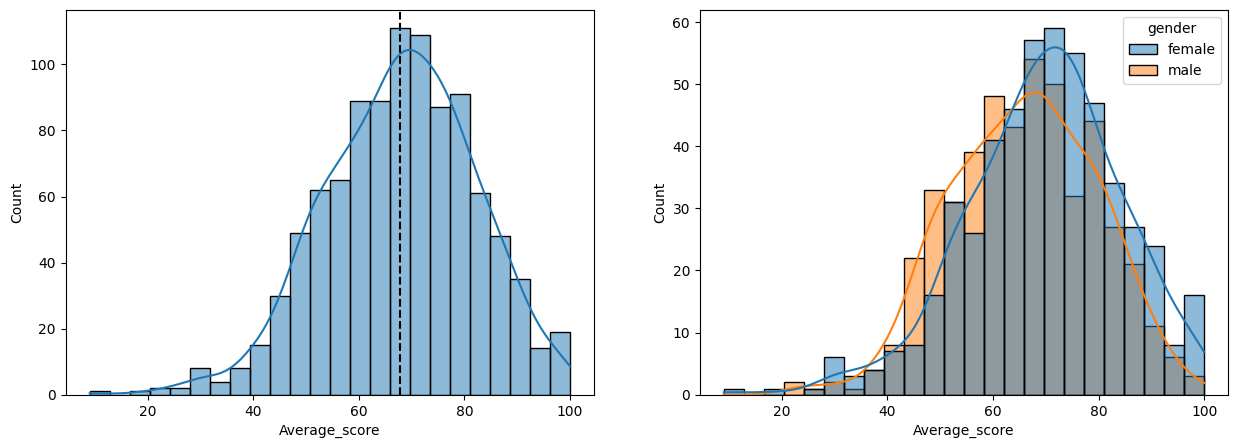

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['Average_score'],kde=True)
plt.axvline(df['Average_score'].mean(),ls='--',color='k')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()

In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average_score'],
      dtype='object')

In [16]:
# removing math_score,reading_score and writing_score columns as we have already created Average_score column using these three
df.drop(['math_score','reading_score','writing_score'],axis=1,inplace=True)

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Average_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333


In [18]:
X = df.drop('Average_score',axis=1)
y = df[['Average_score']]

In [19]:
y

,Average_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [21]:
# encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_transformer = OneHotEncoder()
processing = ColumnTransformer([
    ('OneHotEncoder',cat_transformer,cat_col)
])

X_trans=cat_transformer.fit_transform(X=X)



In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,train_size=0.8,random_state=42)

In [35]:
X_train.shape,X_test.shape

((800, 17), (200, 17))

In [24]:
def evaluation_metrics(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2_squared = r2_score(y_true,y_pred)
    return mae,rmse,r2_squared

In [46]:
# Initializing different models and evaluating there performances
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "XGBRegressor":XGBRegressor()
}

In [47]:
model_list = []
mae_vals_train = []
rmse_vals_train = []
r2_vals_train = []
mae_vals_test = []
rmse_vals_test = []
r2_vals_test = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_list.append(list(models.keys())[i])

    mae_train,rmse_train,r2_score_train=evaluation_metrics(y_train,y_train_pred)
    mae_test,rmse_test,r2_score_test = evaluation_metrics(y_test,y_test_pred)

    mae_vals_train.append(mae_train)
    rmse_vals_train.append(rmse_train)
    r2_vals_train.append(r2_score_train)

    mae_vals_test.append(mae_test)
    rmse_vals_test.append(rmse_test)
    r2_vals_test.append(r2_score_test)

results_df = pd.DataFrame({"Models":model_list,
                    "Mean Absolute Error (Train)":mae_vals_train,
                    "RMSE (Train)":rmse_vals_train,
                    "R2 Score (Train)":r2_vals_train,
                    "Mean Absolute Error (Test)":mae_vals_test,
                    "RMSE (Test)":rmse_vals_test,
                    "R2 Score (Test)":r2_vals_test})
        


In [43]:
models.keys()

dict_keys(['LinearRegression', 'Ridge', 'Lasso', 'AdaBoostRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'XGBRegressor'])

In [49]:
print("Performance of models on train dataset")
results_df.sort_values(by=['Mean Absolute Error (Test)','RMSE (Test)','R2 Score (Test)'])

Performance of models on train dataset


,Models,Mean Absolute Error (Train),RMSE (Train),R2 Score (Train),Mean Absolute Error (Test),RMSE (Test),R2 Score (Test)
0,LinearRegression,9.936148,12.195660,0.254277,10.490183,13.401581,0.162172
1,Ridge,9.935546,12.195703,0.254271,10.492945,13.403383,0.161946
3,AdaBoostRegressor,10.040392,12.318690,0.239155,10.914126,13.918049,0.096351
2,Lasso,10.562460,13.196442,0.126866,11.088572,14.133786,0.068120
5,RandomForestRegressor,8.776719,10.933925,0.400596,11.492937,14.827528,-0.025606
6,CatBoostRegressor,8.687289,10.877013,0.406820,11.630974,14.962669,-0.044386
7,XGBRegressor,8.624492,10.864813,0.408150,11.783975,15.148289,-0.070459
4,DecisionTreeRegressor,8.621866,10.864718,0.408160,11.808056,15.181176,-0.075112
